In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

%matplotlib inline

In [2]:
px_tsla = pd.read_csv('sample_data/tsla_price.csv')
px_msft = pd.read_csv('sample_data/msft_price.csv')

In [3]:
startDate = '2020-12-31'
px_tsla = px_tsla[px_tsla['Date'] >= startDate].copy()
px_msft = px_msft[px_msft['Date'] >= startDate].copy()
px_tsla['return'] = px_tsla['Close'].pct_change()
px_msft['return'] = px_msft['Close'].pct_change()

In [11]:
px_tsla.set_index('Date', inplace=True)
px_msft.set_index('Date', inplace=True)

In [13]:
df = pd.DataFrame(
    {
        'tsla': px_tsla['return'],
        'msft': px_msft['return']
    }
)

Text(0, 0.5, 'msft price')

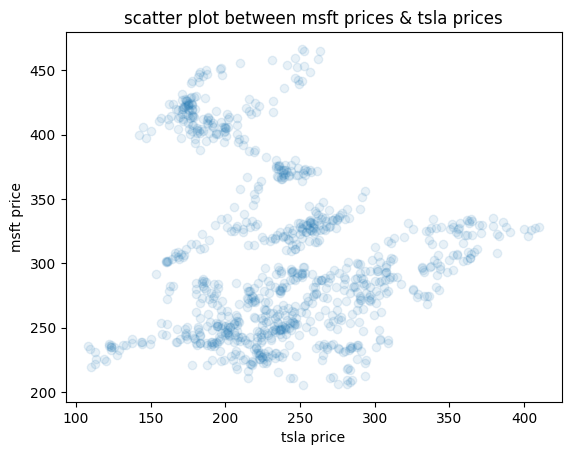

In [4]:
plt.title('scatter plot between msft prices & tsla prices')
plt.scatter(px_tsla['Close'], px_msft['Close'], alpha=0.1)
plt.xlabel('tsla price')
plt.ylabel('msft price')

for purpose fo investment analysis, we care a lot about the price movement, not price itself
<br>look at this example, if we use price of msft against tsla price, the statistical relationship seem to be weak
<br>if we look at the return, the relationship is much stronger

In [15]:
df.dropna(inplace=True)

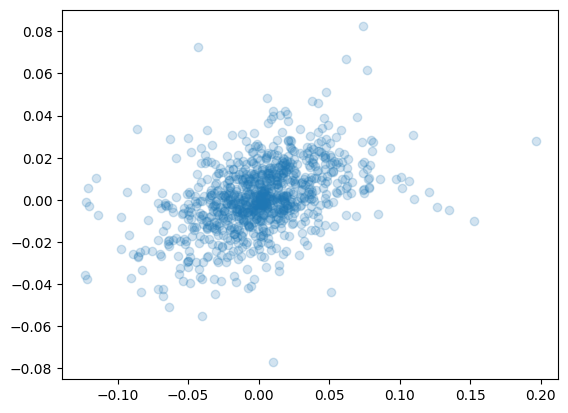

In [17]:
plt.scatter(df['tsla'], df['msft'], alpha=0.2)

In [19]:
### return is sort of correlated
df.corr()

,tsla,msft
tsla,1.000000,0.421467
msft,0.421467,1.000000


In [ ]:
linreg = LinearRegression()
trendline = linreg.fit(pd.DataFrame(df['msft']), df['tsla'])

In [24]:
yhats = trendline.predict(pd.DataFrame(df['msft']))

In [21]:
trendline.intercept_

np.float64(-0.00021802931770065605)

In [22]:
trendline.coef_

array([0.92979269])

with the small coefficient for 2 reasons:
<br>1. correlation of return of tsla and msft is only 0.42
<br>2. return of msft is less volatile than return of tsla

In [ ]:
# r2 is actually the square of correlation for linear regression
0.42**2

0.17639999999999997

In [25]:
r2_score(df['tsla'], yhats)

0.1776342920385514